In [25]:
import numpy as np
import pandas as pd

results05 = np.loadtxt('branin05rbf')
resultsIsolated = np.loadtxt('braninIsolatedrbf')
resultsRandom = np.loadtxt('braninrandomrbf')
resultsBest = np.loadtxt('braninbestrbf')
resultsBestSimAnneal = np.loadtxt('braninBestSimAnnealrbf')
resultsbraninIsolatedSimAnneal = np.loadtxt('braninIsolatedSimAnnealrbf')

In [26]:
global df

def ArraytoDF(resultsArray, methodName):
    
    df = pd.DataFrame(columns=['ExperimentNo', 'Iteration', 'Accuracy', 'Method'])   
    
    for i in range(21):
        for j in range(21):
            df = df.append({'ExperimentNo':i+1, 'Iteration':j+1, 'Accuracy':resultsArray[i][j], 'Method':methodName}, ignore_index=True)
        
    
    return df

In [28]:
Results_DF = [ArraytoDF(results05, 'Branin05'),
              ArraytoDF(resultsIsolated, 'BraninIsolated'),
              ArraytoDF(resultsRandom, 'BraninRandom'),
              ArraytoDF(resultsBest, 'Branin_best'),
              ArraytoDF(resultsBestSimAnneal, 'braninBestSimAnneal'),
              ArraytoDF(resultsbraninIsolatedSimAnneal, 'braninIsolatedSimAnneal')
              ]

In [29]:
Results_DF = pd.concat(Results_DF)

In [30]:
testin = Results_DF[(Results_DF['Iteration'] == 1)|(Results_DF['Iteration'] == 6)|(Results_DF['Iteration'] == 11)|(Results_DF['Iteration'] == 16)|(Results_DF['Iteration'] == 21)]

In [31]:
import numpy as np
from matplotlib.patches import PathPatch

def adjust_box_widths(g, fac):
    """
    Adjust the widths of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

<ipython-input-31-a77ef4e19432>:34: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if np.all(l.get_xdata() == [xmin, xmax]):


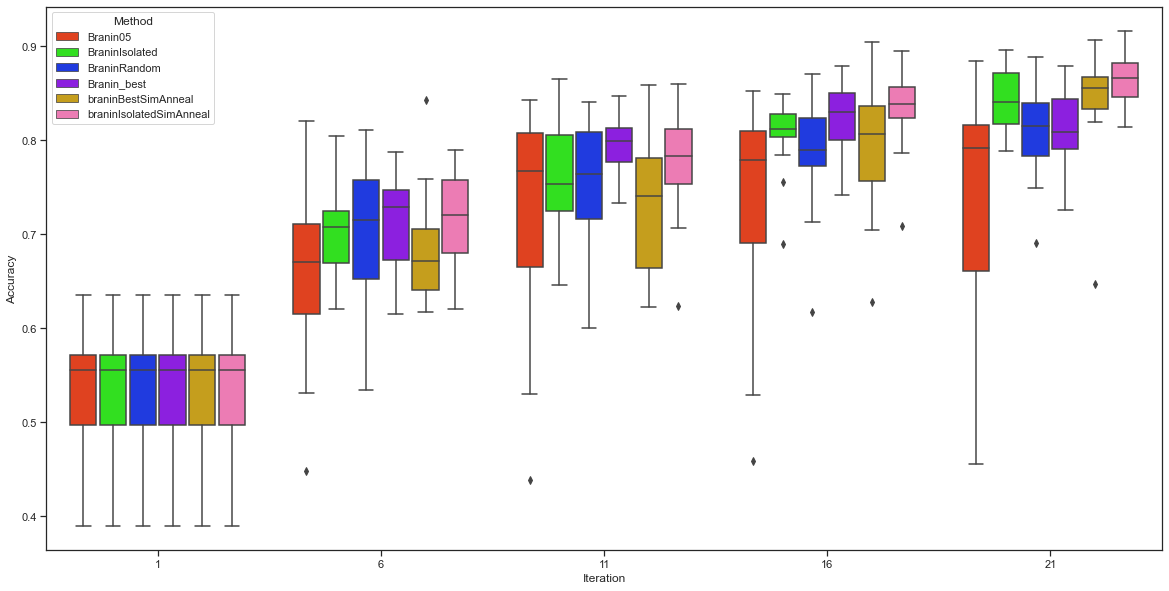

In [32]:
import seaborn as sns
from matplotlib import pyplot
sns.set_theme(style="ticks", palette="pastel")

# Load the example tips dataset
data = testin
palette = {'Branin05': '#ff2d00', 'BraninIsolated': '#18ff00','BraninRandom': '#0024ff',
           'Branin_best': '#9000ff','braninBestSimAnneal': '#e1ad01','braninIsolatedSimAnneal': '#ff69b4'}
# Draw a nested boxplot to show bills by day and time

fig, ax = pyplot.subplots(figsize=(20,10))
sns.boxplot(x="Iteration", y="Accuracy",data=data,
            hue="Method", palette=palette, ax=ax)



adjust_box_widths(fig, 0.9)


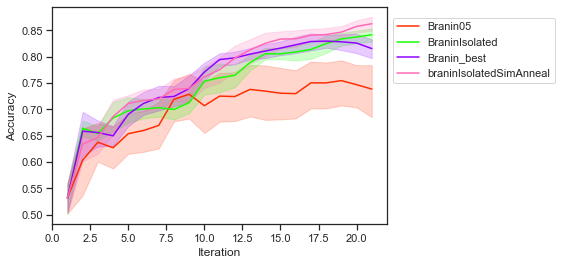

In [8]:
data = Results_DF

ax1 = sns.lineplot(x='Iteration', y='Accuracy', data=data, hue='Method', palette=palette)
ax1.legend(loc='center left', bbox_to_anchor=(1, .8), ncol=1)


In [9]:
import statistics
from scipy.stats import median_absolute_deviation, wilcoxon
from statsmodels.stats.multitest import multipletests

def wilcoxon_holm_eq_check(best_median_i, best_res):
    p_values = []
    #Gather the p-values for best med and other res from wilcoxon
    for i in range(len(best_res)):
        if i != best_median_i:
            _, p_value = wilcoxon(best_res[best_median_i], best_res[i])
            p_values.append(p_value)
        else:
            p_values.append(0)
    #holm correction
    reject, p_val_holm,_,_ = multipletests(p_values,alpha=0.1,method="holm")
    return reject

medians = (statistics.median([el[20] for el in results05]),
           statistics.median([el[20] for el in resultsIsolated]),
           statistics.median([el[20] for el in resultsRandom]),
           statistics.median([el[20] for el in resultsBest]),
           statistics.median([el[20] for el in resultsBestSimAnneal]),
           statistics.median([el[20] for el in resultsbraninIsolatedSimAnneal]))

best_median = max(medians)
best_median_i = medians.index((best_median))

best_res = ([el[20] for el in results05],
           [el[20] for el in resultsIsolated],
           [el[20] for el in resultsRandom],
           [el[20] for el in resultsBest],
           [el[20] for el in resultsBestSimAnneal],
           [el[20] for el in resultsbraninIsolatedSimAnneal])

print('medians list:', medians)
print('best_median_i:',best_median_i)
print(best_res)
print('best_res shape:', len(best_res), '*', len(best_res[0]))
print('result = ', wilcoxon_holm_eq_check(best_median_i, best_res))



NameError: name 'resultsRandom' is not defined